<a href="https://colab.research.google.com/github/Faizan-Siddique/Capstone_Project_3/blob/main/Capstone_3_Steel_Defects_Classification_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capstone Project 3 - Steel Defects Classification and Segmentation

Artificial Intelligence and Machine Learning are transforming the manufacturing industry. According to the report released by World Economic Forum, these technologies will play significant roles in the fourth industrial revolution. 

Major areas which can be benefited from this are:

1. Maintenance Department
2. Production Department
3. Supply Chain Department
4. Quality Control Department
5. Industrial Safety Department

Deep learning has been proven to be superior in detecting and localizing defects using imagery data which could significantly improve the production efficiency in the manufacturing industry

Detecting defects would help in improving the quality of manufacturing as 
well as in reducing the waste due to production defects.



## Data Source : https://www.kaggle.com/c/severstal-steel-defect-detection/data

Data contains aroung 12600 images with 4 classes of defects, Our aim is to detect :
1. Detect Weather image has defect or not.
2. Classifying type of defects and localizing it with the help of mask.

## Step 1 : Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
from google.colab import files 
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data containing defect images with segmentation mask 
defect_class_mask_df = pd.read_csv('/content/drive/MyDrive/Capstone_3_Steel_Defects_Classification/train.csv')

In [4]:
# data containing defective and non defective images
all_images_df = pd.read_csv('/content/drive/MyDrive/Capstone_3_Steel_Defects_Classification/defect_and_no_defect.csv')


In [5]:
defect_class_mask_df

,ImageId,ClassId,EncodedPixels
0,d2291de5c.jpg,1,147963 3 148213 9 148461 18 148711 24 148965 2...
1,78416c3d0.jpg,3,54365 3 54621 7 54877 10 55133 12 55388 14 556...
2,2283f2183.jpg,3,201217 43 201473 128 201729 213 201985 5086 20...
3,f0dc068a8.jpg,3,159207 26 159412 77 159617 128 159822 179 1600...
4,00d639396.jpg,3,229356 17 229595 34 229850 36 230105 37 230360...
...,...,...,...
5743,c12842f5e.jpg,3,88 23 342 29 596 34 850 39 1105 44 1361 46 161...
5744,2222a03b3.jpg,3,63332 4 63587 11 63841 20 64096 27 64351 35 64...
5745,b43ea2c01.jpg,1,185024 7 185279 11 185535 12 185790 13 186045 ...
5746,1bc37a6f4.jpg,3,303867 1 304122 3 304376 6 304613 3 304630 9 3...


In [6]:
all_images_df

,ImageID,label
0,0002cc93b.jpg,1
1,0007a71bf.jpg,1
2,000a4bcdd.jpg,1
3,000f6bf48.jpg,1
4,0014fce06.jpg,1
...,...,...
12992,0482ee1d6.jpg,0
12993,04802a6c2.jpg,0
12994,03ae2bc91.jpg,0
12995,04238d7e3.jpg,0


## Step 2 - Visualize and Explore Data set

In [7]:
defect_class_mask_df['mask'] = defect_class_mask_df['ClassId'].map(lambda x: 1)

### Adding a mask column to find weather an image has more than 1 defects

In [8]:
defect_class_mask_df.head(50)

,ImageId,ClassId,EncodedPixels,mask
0,d2291de5c.jpg,1,147963 3 148213 9 148461 18 148711 24 148965 2...,1
1,78416c3d0.jpg,3,54365 3 54621 7 54877 10 55133 12 55388 14 556...,1
2,2283f2183.jpg,3,201217 43 201473 128 201729 213 201985 5086 20...,1
3,f0dc068a8.jpg,3,159207 26 159412 77 159617 128 159822 179 1600...,1
4,00d639396.jpg,3,229356 17 229595 34 229850 36 230105 37 230360...,1
5,17d02873a.jpg,3,254980 43 255236 127 255492 211 255748 253 256...,1
6,47b5ab1bd.jpg,3,128976 8 129230 12 129484 16 129739 23 129995 ...,1
7,a6ecee828.jpg,3,179011 27 179126 73 179259 39 179375 80 179497...,1
8,11aaf18e2.jpg,3,303235 2 303489 7 303743 9 303997 11 304181 2 ...,1
9,cdf669a1f.jpg,4,310246 11 310499 25 310753 28 311007 31 311262...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of images per class')

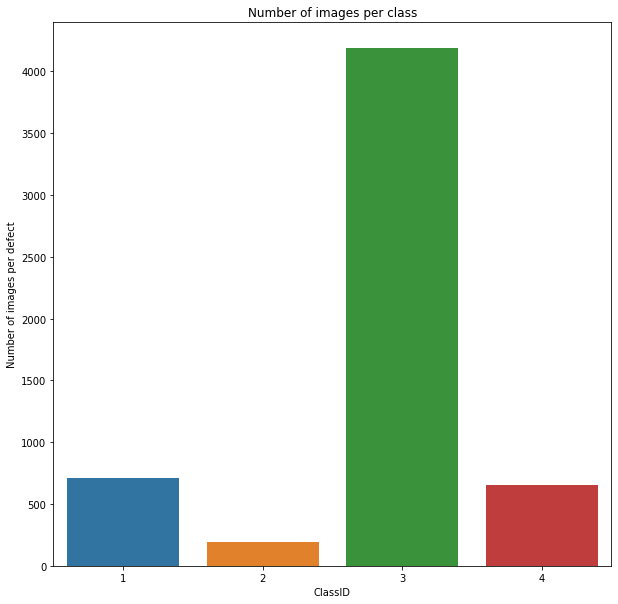

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(defect_class_mask_df['ClassId'])
plt.ylabel('Number of images per defect')
plt.xlabel('ClassID')
plt.title('Number of images per class')

### As seen from the above count plot of defects in our training set , our training set is highly imbalanced dataset with class 3 defects having a majority

In [10]:
defect_type = defect_class_mask_df.groupby(['ImageId'])['mask'].sum()

In [11]:
defect_type

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
                ..
ffcf72ecf.jpg    1
fff02e9c5.jpg    1
fffe98443.jpg    1
ffff4eaa8.jpg    1
ffffd67df.jpg    1
Name: mask, Length: 5474, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of defects per image')

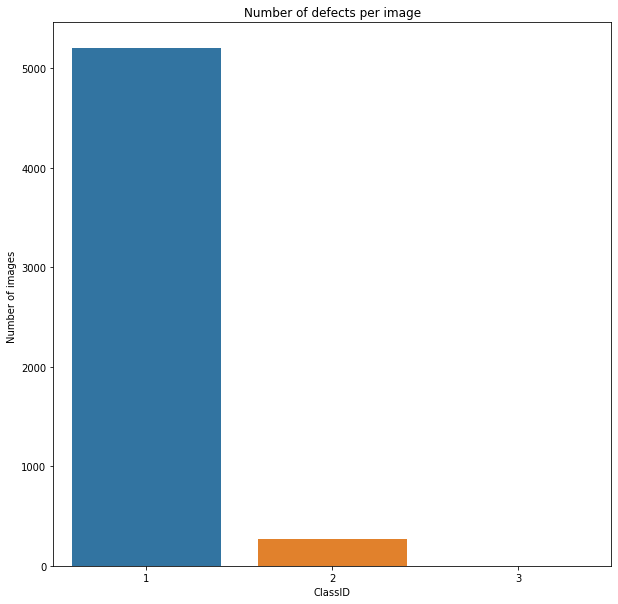

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(defect_type)
plt.ylabel('Number of images ')
plt.xlabel('ClassID')
plt.title('Number of defects per image')

In [13]:
defect_type.value_counts()

1    5201
2     272
3       1
Name: mask, dtype: int64

### As seen from value_counts we have 
* 5201 images with 1 defect
* 272  images with 2 defect
* 1    images with 3 defect

In [14]:
defect_class_mask_df.shape

(5748, 4)

### Defective images with mask information are 5748

In [15]:
all_images_df.shape 

(12997, 2)

### all_images_df contains both defect and non defect images our first task will be to classify which image is defective or not

In [16]:
all_images_df.label.value_counts()

1    7095
0    5902
Name: label, dtype: int64

Text(0.5, 1.0, 'Defect and non-defect images')

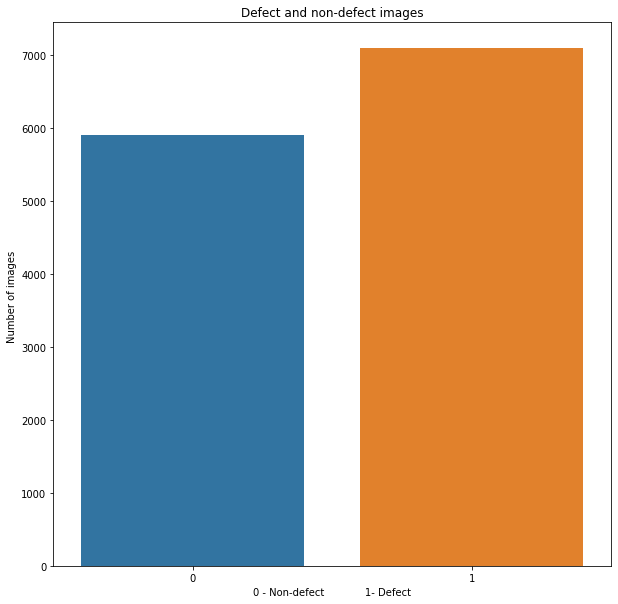

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x = all_images_df.label.value_counts().index, y = all_images_df.label.value_counts() )
plt.ylabel('Number of images ')
plt.xlabel('0 - Non-defect             1- Defect')
plt.title('Defect and non-defect images')

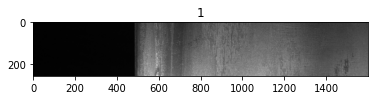

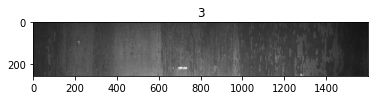

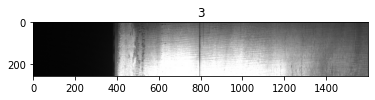

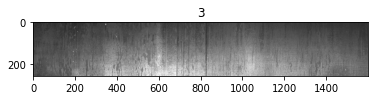

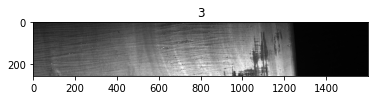

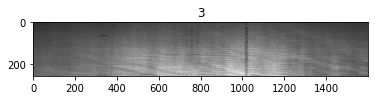

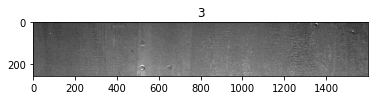

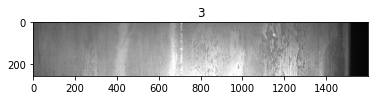

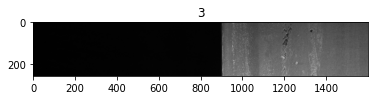

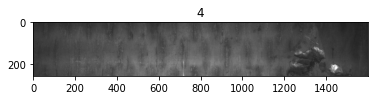

In [20]:
#Visualizing images with defects along with there corresponding labels
# images are of the size 256 * 1600
from google.colab.patches import cv2_imshow
train_dir = '/content/drive/MyDrive/Capstone_3_Steel_Defects_Classification/train_images'
for i in range(10):
  # specifying the path to images given there image ids
  img = io.imread(os.path.join(train_dir,defect_class_mask_df.ImageId[i]))
  plt.figure()
  plt.title(defect_class_mask_df.ClassId[i])
  plt.imshow(img)

In [23]:
defect_class_mask_df

,ImageId,ClassId,EncodedPixels,mask
0,d2291de5c.jpg,1,147963 3 148213 9 148461 18 148711 24 148965 2...,1
1,78416c3d0.jpg,3,54365 3 54621 7 54877 10 55133 12 55388 14 556...,1
2,2283f2183.jpg,3,201217 43 201473 128 201729 213 201985 5086 20...,1
3,f0dc068a8.jpg,3,159207 26 159412 77 159617 128 159822 179 1600...,1
4,00d639396.jpg,3,229356 17 229595 34 229850 36 230105 37 230360...,1
...,...,...,...,...
5743,c12842f5e.jpg,3,88 23 342 29 596 34 850 39 1105 44 1361 46 161...,1
5744,2222a03b3.jpg,3,63332 4 63587 11 63841 20 64096 27 64351 35 64...,1
5745,b43ea2c01.jpg,1,185024 7 185279 11 185535 12 185790 13 186045 ...,1
5746,1bc37a6f4.jpg,3,303867 1 304122 3 304376 6 304613 3 304630 9 3...,1


### As seen from our images with defect data image information is in the form of encoded pixels format or better known as run length encoding format we can understand this better once we go through the concept of masking an image.

### The goal of image segmentation is to understand the image at the pixel level. It associates each pixel with a certain class. The output produce by image segmentation model is called a “mask” of the image.
### Masks can be represented by associating pixel values with their coordinates. For example if we have a black image of shape (2,2), this can be represented as: 

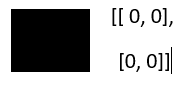

### If our output mask is as follows:
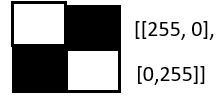

### To represent this mask we have to first flatten the image into a 1-D array. This would result in something like [255,0,0,255] for mask. Then, we can use the index to create the mask. Finally we would have something like [1,0,0,1] as our mask.

## Run length Encoding :
* Sometimes it is hard to represent mask using index as it would make the length of mask equal to product of height and width of the image
* To overcome this we use lossless data compression technique called Run-length encoding (RLE), which stores sequences that  contain many consecutive data elements as a single data value followed by the count.
* For example, assume we have an image (single row) containing plain black text on a solid white background. B represents black pixel and W represents white:


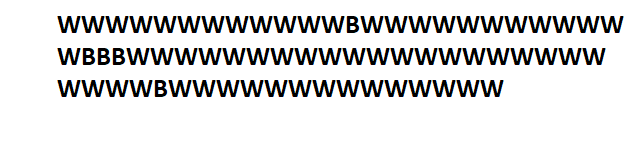

## Run Length Encoding is : 
* **12W1B12W3B24W1B14W**
* **This can be interpreted as a sequence of twelve Ws, one B, twelve Ws, three Bs, etc**

 For understanding following links was referred :

* https://www.kaggle.com/ianmoone0617/aerial-drone-semantic-image-segmentation-fastai

In [24]:
# Utilities file contains the code for rle2mask, mask2rle, custom loss function and custom data generator
# since the data provided for segmentation is in RLE format (run length encoded), we will be using the following function to convert the RLE to mask. 
# we can convert the mask back again to RLE to assess model performance (accuracy).
# Code source for these function came from: https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def mask2rle(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)
 
def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T


train_dir = '/content/drive/MyDrive/Capstone_3_Steel_Defects_Classification/train_images'

In [28]:
# Let's try to use the rle2mask on a sample image 
image_index = 20 
mask = rle2mask(defect_class_mask_df.EncodedPixels[image_index], (img.shape[1], img.shape[0]))
mask.shape

(256, 1600)

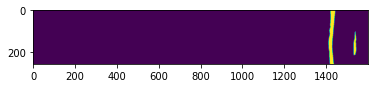

In [29]:
# Let's show the mask
plt.imshow(mask)

(256, 1600, 3)

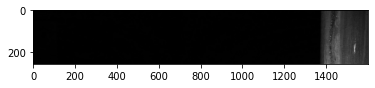

In [30]:
# Having a look at image without mask
img = io.imread(os.path.join(train_dir, defect_class_mask_df.ImageId[image_index]))
plt.imshow(img)
img.shape

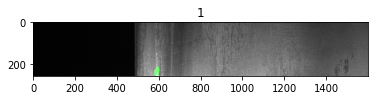

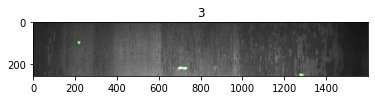

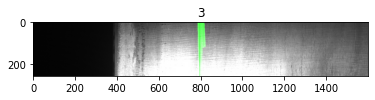

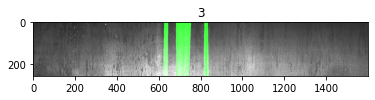

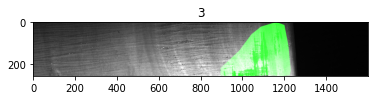

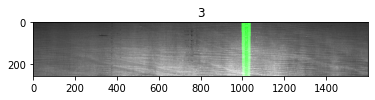

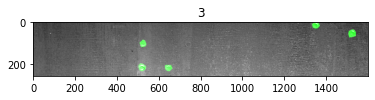

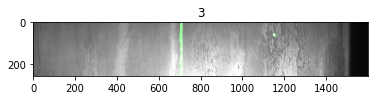

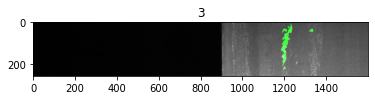

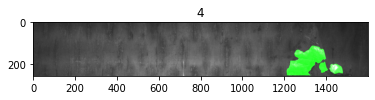

In [32]:
for i in range(10):

  # Read the images using opencv and converting to rgb format
  img = io.imread(os.path.join(train_dir, defect_class_mask_df.ImageId[i]))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Get the mask for the image from rle
  mask = rle2mask(defect_class_mask_df.EncodedPixels[i], (img.shape[1], img.shape[0]))
  
  # Let's color the pixels with values = 1 
  img[mask == 1,1] = 255
  plt.figure()
  plt.imshow(img)
  plt.title(defect_class_mask_df.ClassId[i])